In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, date
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

pd.set_option('mode.chained_assignment', None)

In [2]:
# Loading the .csv files using Pandas
# df_game = pd.read_csv('../input/nfl-big-data-bowl-2023/games.csv')
# df_scout = pd.read_csv('../input/nfl-big-data-bowl-2023/pffScoutingData.csv')
df_player = pd.read_csv('../input/nfl-big-data-bowl-2023/players.csv')
# df_play = pd.read_csv('../input/nfl-big-data-bowl-2023/plays.csv')
df_week1 = pd.read_csv('../input/nfl-big-data-bowl-2023/week1.csv')
df_week2 = pd.read_csv('../input/nfl-big-data-bowl-2023/week2.csv')

# **week merge df_player**

In [3]:
# Merge df_week1 and df_player
df_week_1_player = pd.merge(df_week1, df_player, on=['nflId'])

# Merge df_week2 and df_player
df_week_2_player = pd.merge(df_week2, df_player, on=['nflId'])

df_week_1_player

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,...,dis,o,dir,event,height,weight,birthDate,collegeName,officialPosition,displayName
0,2021090900,97,25511.0,1,2021-09-10T00:26:31.100,12.0,TB,right,37.77,24.22,...,0.03,165.16,84.99,None,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,2021090900,97,25511.0,2,2021-09-10T00:26:31.200,12.0,TB,right,37.78,24.22,...,0.02,164.33,92.87,None,6-4,225,1977-08-03,Michigan,QB,Tom Brady
2,2021090900,97,25511.0,3,2021-09-10T00:26:31.300,12.0,TB,right,37.78,24.24,...,0.01,160.24,68.55,None,6-4,225,1977-08-03,Michigan,QB,Tom Brady
3,2021090900,97,25511.0,4,2021-09-10T00:26:31.400,12.0,TB,right,37.73,24.25,...,0.06,152.13,296.85,None,6-4,225,1977-08-03,Michigan,QB,Tom Brady
4,2021090900,97,25511.0,5,2021-09-10T00:26:31.500,12.0,TB,right,37.69,24.26,...,0.04,148.33,287.55,None,6-4,225,1977-08-03,Michigan,QB,Tom Brady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069503,2021091300,4094,48220.0,46,2021-09-14T03:24:20.000,65.0,BAL,left,43.49,39.86,...,0.59,318.58,342.01,None,6-4,308,1997-08-13,California,G,Patrick Mekari
1069504,2021091300,4094,48220.0,47,2021-09-14T03:24:20.100,65.0,BAL,left,43.31,40.43,...,0.60,315.03,341.46,None,6-4,308,1997-08-13,California,G,Patrick Mekari
1069505,2021091300,4094,48220.0,48,2021-09-14T03:24:20.200,65.0,BAL,left,43.09,41.00,...,0.61,318.59,339.48,None,6-4,308,1997-08-13,California,G,Patrick Mekari
1069506,2021091300,4094,48220.0,49,2021-09-14T03:24:20.300,65.0,BAL,left,42.87,41.57,...,0.61,316.08,338.39,None,6-4,308,1997-08-13,California,G,Patrick Mekari


# **篩選出CB位置的球員**

In [4]:
# 篩選出CB位置的球員
officialPositionFilter = df_week_1_player['officialPosition'] == 'CB'
df_week_1_player = df_week_1_player.loc[officialPositionFilter]

officialPositionFilter2 = df_week_2_player['officialPosition'] == 'CB'
df_week_2_player = df_week_2_player.loc[officialPositionFilter2]

df_week_1_player

,gameId,playId,nflId,frameId,time,jerseyNumber,team,playDirection,x,y,...,dis,o,dir,event,height,weight,birthDate,collegeName,officialPosition,displayName
15180,2021090900,97,43478.0,1,2021-09-10T00:26:31.100,30.0,DAL,right,43.49,37.55,...,0.07,302.07,58.43,None,5-11,196,1993-12-15,Purdue,CB,Anthony Brown
15181,2021090900,97,43478.0,2,2021-09-10T00:26:31.200,30.0,DAL,right,43.53,37.58,...,0.05,300.87,55.28,None,5-11,196,1993-12-15,Purdue,CB,Anthony Brown
15182,2021090900,97,43478.0,3,2021-09-10T00:26:31.300,30.0,DAL,right,43.54,37.60,...,0.02,300.87,55.12,None,5-11,196,1993-12-15,Purdue,CB,Anthony Brown
15183,2021090900,97,43478.0,4,2021-09-10T00:26:31.400,30.0,DAL,right,43.59,37.65,...,0.08,300.87,51.06,None,5-11,196,1993-12-15,Purdue,CB,Anthony Brown
15184,2021090900,97,43478.0,5,2021-09-10T00:26:31.500,30.0,DAL,right,43.61,37.61,...,0.05,297.31,60.78,None,5-11,196,1993-12-15,Purdue,CB,Anthony Brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069453,2021091300,2256,52427.0,27,2021-09-14T02:04:11.200,20.0,LV,right,63.52,47.25,...,0.54,170.07,83.26,pass_forward,6-0,195,NaN,Ohio State,CB,Damon Arnette
1069454,2021091300,2256,52427.0,28,2021-09-14T02:04:11.300,20.0,LV,right,64.04,47.29,...,0.53,162.77,87.33,None,6-0,195,NaN,Ohio State,CB,Damon Arnette
1069455,2021091300,2256,52427.0,29,2021-09-14T02:04:11.400,20.0,LV,right,64.55,47.30,...,0.51,163.77,91.98,None,6-0,195,NaN,Ohio State,CB,Damon Arnette
1069456,2021091300,2256,52427.0,30,2021-09-14T02:04:11.500,20.0,LV,right,65.05,47.26,...,0.50,163.77,95.79,None,6-0,195,NaN,Ohio State,CB,Damon Arnette


# **看S資料分佈**

In [5]:
df_week_1_player['s'].describe()

count    132881.000000
mean          2.786893
std           2.227920
min           0.000000
25%           0.690000
50%           2.530000
75%           4.410000
max          10.390000
Name: s, dtype: float64

In [6]:
df_week_2_player['s'].describe()

count    124813.000000
mean          2.856146
std           2.231201
min           0.000000
25%           0.760000
50%           2.650000
75%           4.510000
max          10.090000
Name: s, dtype: float64

# **計算年齡Function**

In [7]:
# get age
def get_age(date_val):
    today = 2023 + (1/12)
    try:
        date_val = date_val.split('-')
        bd = int(date_val[0]) + (int(date_val[1]) / 12)
    except:
        try:
            date_val = date_val.split('/')
            bd = int(date_val[0]) + (int(date_val[1]) / 12)
        except:
            return 28
    return today - bd

print(get_age('1992-04-10'))

30.75


# **計算身高Function**

In [8]:
# get inches to cm  
def height_cm(h):
    temp = list(map(int, h.split('-')))
    return temp[0] * 12 * 2.54 + temp[1] * 2.54

print(height_cm('6-4'))

193.04


# **計算體重Function**

In [9]:
# get pounds to kilograms function
def weight_kg(w):
    return float (w) * 0.45

print(weight_kg('44'))

19.8


# **計算Metric BMI Function**

In [10]:
# get BMI function
def getBMI(h, w):
    return round(float (w) / (float (h) / 100) ** 2, 2)

print(getBMI('179', '80'))

24.97


# **設定age column**

In [11]:
# set age column
df_week_1_player['age'] = df_week_1_player['birthDate'].apply(get_age)

df_week_2_player['age'] = df_week_2_player['birthDate'].apply(get_age)

df_week_1_player['age'].describe()

count    132881.000000
mean         28.285776
std           2.332972
min          23.750000
25%          26.666667
50%          28.000000
75%          29.500000
max          34.250000
Name: age, dtype: float64

# **設定height column**

In [12]:
# set height_new column
df_week_1_player['height_new'] = df_week_1_player['height'].apply(height_cm)

df_week_2_player['height_new'] = df_week_2_player['height'].apply(height_cm)

df_week_1_player['height_new'].describe()

count    132881.000000
mean        181.948457
std           3.953531
min         175.260000
25%         180.340000
50%         180.340000
75%         185.420000
max         193.040000
Name: height_new, dtype: float64

# **設定weight column**

In [13]:
# set weight_new column
df_week_1_player['weight_new'] = df_week_1_player['weight'].apply(weight_kg)

df_week_2_player['weight_new'] = df_week_2_player['weight'].apply(weight_kg)

df_week_1_player['weight_new'].describe()

count    132881.00000
mean         87.42529
std           3.49568
min          76.50000
25%          85.50000
50%          87.30000
75%          90.00000
max          96.75000
Name: weight_new, dtype: float64

# **設定BMI column**

In [14]:
# set BMI column
df_week_1_player['BMI'] = df_week_1_player.apply(lambda r:getBMI(r['height_new'], r['weight_new']), axis = 1)

df_week_2_player['BMI'] = df_week_2_player.apply(lambda r:getBMI(r['height_new'], r['weight_new']), axis = 1)

df_week_1_player['BMI'].describe()

count    132881.000000
mean         26.421843
std           1.072703
min          23.440000
25%          25.700000
50%          26.570000
75%          27.050000
max          29.040000
Name: BMI, dtype: float64

# **顯示速度前幾名的選手**

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)

sortByS = df_week_1_player.sort_values(by=['nflId', 's'], ascending= False).drop_duplicates('nflId')
sortByS = sortByS[['displayName', 'nflId', 'team', 'age', 'height_new', 'weight_new', 'BMI', 'birthDate', 's']].sort_values(by=['s'], ascending= False)
print(sortByS['s'].describe())
sortByS.head(12)

count    120.000000
mean       8.329000
std        1.020527
min        4.490000
25%        7.850000
50%        8.545000
75%        8.930000
max       10.390000
Name: s, dtype: float64


,displayName,nflId,team,age,height_new,weight_new,BMI,birthDate,s
243068,Donte Jackson,46124.0,CAR,27.166667,177.80,81.00,25.62,1995-11-08,10.39
305789,Chidobe Awuzie,44872.0,CIN,27.666667,182.88,90.90,27.18,1995-05-24,9.81
430762,Jeff Okudah,52411.0,DET,23.916667,185.42,90.00,26.18,1999-02-02,9.81
971266,Jaylon Johnson,52458.0,CHI,23.750000,182.88,87.75,26.24,1999-04-19,9.73
460763,C.J. Henderson,52417.0,JAX,24.333333,185.42,85.95,25.00,1998-09-30,9.72
992087,Marlon Humphrey,44828.0,BAL,26.500000,182.88,88.65,26.51,1996-07-08,9.70
886377,Patrick Surtain,53438.0,DEN,28.000000,187.96,91.35,25.86,NaN,9.61
628628,Elijah Molden,53529.0,TEN,28.000000,177.80,85.50,27.05,NaN,9.55
202947,Tre'Davious White,44839.0,BUF,28.000000,180.34,86.40,26.57,1995-01-16,9.55
728378,Troy Hill,42816.0,CLE,31.416667,180.34,82.80,25.46,1991-08-29,9.48


In [16]:
sortByS_week_2 = df_week_2_player.sort_values(by=['nflId', 's'], ascending= False).drop_duplicates('nflId')
sortByS_week_2 = sortByS_week_2[['displayName', 'nflId', 'team', 'age', 'height_new', 'weight_new', 'BMI', 'birthDate', 's']].sort_values(by=['s'], ascending= False)
print(sortByS_week_2['s'].describe())
sortByS_week_2.head(12)

count    121.000000
mean       8.313471
std        1.001541
min        3.600000
25%        7.890000
50%        8.410000
75%        9.000000
max       10.090000
Name: s, dtype: float64


,displayName,nflId,team,age,height_new,weight_new,BMI,birthDate,s
130059,Desmond Trufant,39968.0,NO,32.333333,182.88,85.50,25.56,1990-09-10,10.09
224924,Denzel Ward,46073.0,CLE,25.750000,180.34,85.95,26.43,1997-04-28,9.99
262489,Darious Williams,46456.0,LA,29.833333,175.26,84.15,27.40,1993-03-15,9.75
410360,Byron Jones,42370.0,MIA,30.333333,182.88,92.25,27.58,1992-09-26,9.74
791054,Jourdan Lewis,44904.0,DAL,27.416667,177.80,87.75,27.76,1995-08-31,9.69
278355,T.J. Carrie,41448.0,IND,32.500000,182.88,91.80,27.45,1990-07-28,9.65
704440,A.J. Terrell,52424.0,ATL,24.333333,187.96,85.50,24.20,1998-09-23,9.62
417963,Justin Coleman,42827.0,MIA,29.833333,180.34,85.50,26.29,1993-03-27,9.61
304892,Isaiah Rodgers,52619.0,IND,25.000000,177.80,76.50,24.20,1998-01-07,9.49
550951,Deommodore Lenoir,53601.0,SF,28.000000,180.34,90.90,27.95,NaN,9.48


# **設定Feature and Target**

In [17]:
# Create X and y
X, y = df_week_1_player[['age', 'x', 'y', 'dis', 'o', 'dir']], df_week_1_player[['s']]

X_test, y_test = df_week_2_player[['age', 'x', 'y', 'dis', 'o', 'dir']], df_week_2_player[['s']]

# **資料分割成 X_train, X_val, y_train, y_val**

In [18]:
# Split the data into data of training and data test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# **模型訓練**

In [19]:
# Create model and model training
from keras.layers import Input, Dense
from keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_network(input_features=None):
    inputs = Input(shape=(input_features,), name="input")
    x = Dense(32, activation='relu', name="hidden1")(inputs)
    x = Dense(32, activation='relu', name="hidden2")(x)
    x = Dense(32, activation='relu', name="hidden3")(x)
    x = Dense(32, activation='relu', name="hidden4")(x)
    x = Dense(16, activation='relu', name="hidden5")(x)
    prediction = Dense(1, activation='linear', name="final")(x)
    model = Model(inputs=inputs, outputs=prediction)
    model.compile(optimizer=Adam(learning_rate=0.001), loss = 'mse', metrics = ['mae'])
    return model

model = build_network(input_features=6)
train_history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_val, y_val))

2023-01-10 02:44:39.434782: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-01-10 02:44:55.017208: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
3322/3322 [==============================] - 10s 3ms/step - loss: 3.1740 - mae: 1.3636 - val_loss: 0.4264 - val_mae: 0.5473
Epoch 2/50
3322/3322 [==============================] - 6s 2ms/step - loss: 0.1384 - mae: 0.2813 - val_loss: 0.0676 - val_mae: 0.2056
Epoch 3/50
3322/3322 [==============================] - 6s 2ms/step - loss: 0.0729 - mae: 0.2056 - val_loss: 0.0986 - val_mae: 0.2667
Epoch 4/50
3322/3322 [==============================] - 6s 2ms/step - loss: 0.0618 - mae: 0.1877 - val_loss: 0.0313 - val_mae: 0.1422
Epoch 5/50
3322/3322 [==============================] - 6s 2ms/step - loss: 0.0511 - mae: 0.1690 - val_loss: 0.0953 - val_mae: 0.2690
Epoch 6/50
3322/3322 [==============================] - 6s 2ms/step - loss: 0.0420 - mae: 0.1558 - val_loss: 0.0322 - val_mae: 0.1398
Epoch 7/50
3322/3322 [==============================] - 6s 2ms/step - loss: 0.0411 - mae: 0.1544 - val_loss: 0.0562 - val_mae: 0.1907
Epoch 8/50
3322/3322 [==============================] - 7s 2m

# **Training Curve and MAE**

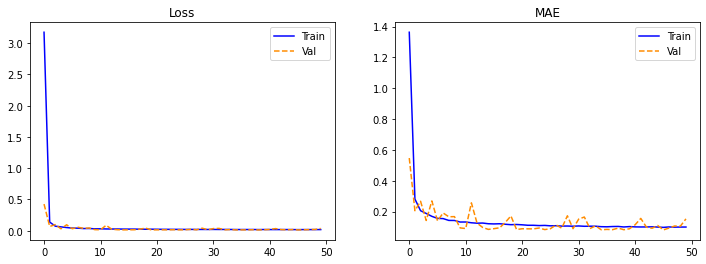

In [20]:
fig = plt.figure(figsize=(12, 4))

loss_plot = fig.add_subplot(121)
loss_plot.plot(train_history.history['loss'], color='blue', label='Train')
loss_plot.plot(train_history.history['val_loss'], color='darkorange', linestyle='dashed', label='Val')
loss_plot.title.set_text('Loss')
loss_plot.legend()

mae_plot = fig.add_subplot(122)
mae_plot.plot(train_history.history['mae'], color='blue', label='Train')
mae_plot.plot(train_history.history['val_mae'], color='darkorange', linestyle='dashed', label='Val')
mae_plot.title.set_text('MAE')
mae_plot.legend()

In [21]:
# MAE
print("Model Train MAE: " + str(mean_absolute_error(y_train, model.predict(X_train))))
print("Model Val MAE: " + str(mean_absolute_error(y_val, model.predict(X_val))))

Model Train MAE: 0.15255286396712245
Model Val MAE: 0.15265206691634173


# **預測**

In [22]:
# Predict
pred_model = model.predict(X_test)
print("Prediction MAE: " + str(mean_absolute_error(y_test, pred_model)))

Prediction MAE: 0.15290211507651552


# **前15筆預測值和實際值比較**

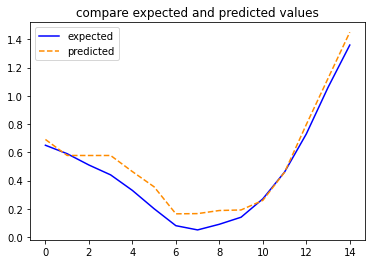

In [23]:
# compare expected and predicted values
plt.plot(y_test.head(15).values, color="blue", label='expected')
plt.plot(pred_model[0:15], color='darkorange', linestyle='dashed', label='predicted')
plt.title("compare expected and predicted values")
plt.legend()
plt.show()

# **======加入Metric======**

# **設定Feature and Target**

In [24]:
# Create X and y
X_metric, y_metric = df_week_1_player[['age', 'x', 'y', 'dis', 'o', 'dir', 'BMI']], df_week_1_player[['s']]

X_test_metric, y_test_metric = df_week_2_player[['age', 'x', 'y', 'dis', 'o', 'dir', 'BMI']], df_week_2_player[['s']]

# **資料分割成 X_train_metric, X_val_metric, y_train_metric, y_val_metric**

In [25]:
# Split the data into data of training and data test
X_train_metric, X_val_metric, y_train_metric, y_val_metric = train_test_split(X_metric, y_metric, test_size=0.2)

# **模型訓練**

In [70]:
model_metric = build_network(input_features=7)
train_history_metric = model_metric.fit(X_train_metric, y_train_metric, batch_size=32, epochs=50, verbose=1, validation_data=(X_val_metric, y_val_metric))

Epoch 1/50
3322/3322 [==============================] - 20s 6ms/step - loss: 2.6830 - mae: 1.2524 - val_loss: 0.2229 - val_mae: 0.3664
Epoch 2/50
3322/3322 [==============================] - 11s 3ms/step - loss: 0.1739 - mae: 0.3176 - val_loss: 0.0713 - val_mae: 0.1997
Epoch 3/50
3322/3322 [==============================] - 10s 3ms/step - loss: 0.0924 - mae: 0.2330 - val_loss: 0.0320 - val_mae: 0.1327
Epoch 4/50
3322/3322 [==============================] - 11s 3ms/step - loss: 0.0662 - mae: 0.1958 - val_loss: 0.0473 - val_mae: 0.1720
Epoch 5/50
3322/3322 [==============================] - 11s 3ms/step - loss: 0.0589 - mae: 0.1822 - val_loss: 0.0275 - val_mae: 0.1248
Epoch 6/50
3322/3322 [==============================] - 11s 3ms/step - loss: 0.0487 - mae: 0.1664 - val_loss: 0.0249 - val_mae: 0.1188
Epoch 7/50
3322/3322 [==============================] - 11s 3ms/step - loss: 0.0437 - mae: 0.1583 - val_loss: 0.0416 - val_mae: 0.1651
Epoch 8/50
3322/3322 [==============================] -

# **Training Curve and MAE**

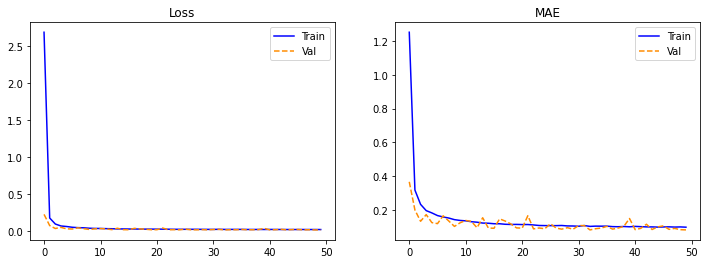

In [71]:
fig = plt.figure(figsize=(12, 4))

loss_plot = fig.add_subplot(121)
loss_plot.plot(train_history_metric.history['loss'], color='blue', label='Train')
loss_plot.plot(train_history_metric.history['val_loss'], color='darkorange', linestyle='dashed', label='Val')
loss_plot.title.set_text('Loss')
loss_plot.legend()

mae_plot = fig.add_subplot(122)
mae_plot.plot(train_history_metric.history['mae'], color='blue', label='Train')
mae_plot.plot(train_history_metric.history['val_mae'], color='darkorange', linestyle='dashed', label='Val')
mae_plot.title.set_text('MAE')
mae_plot.legend()

In [72]:
# Predict
print("Model Train MAE: " + str(mean_absolute_error(y_train_metric, model_metric.predict(X_train_metric))))
print("Model Val MAE: " + str(mean_absolute_error(y_val_metric, model_metric.predict(X_val_metric))))

Model Train MAE: 0.08164448274441852
Model Val MAE: 0.08158182535836205


# **預測**

In [73]:
# MAE
pred_model_metric = model_metric.predict(X_test_metric)
print("Prediction MAE: " + str(mean_absolute_error(y_test_metric, pred_model_metric)))

Prediction MAE: 0.08297008542011555


# **前15筆預測值和實際值比較**

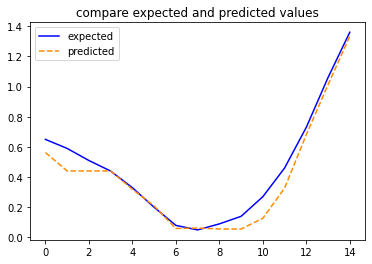

In [74]:
# compare expected and predicted values
plt.plot(y_test_metric.head(15).values, color="blue", label='expected')
plt.plot(pred_model_metric[0:15], color='darkorange', linestyle='dashed', label='predicted')
plt.title("compare expected and predicted values")
plt.legend()
plt.show()